# Очистка данных переписи населения США

Вас только что приняли на работу на должность аналитика данных в Бюро переписи населения, которое собирает данные переписи и создает на их основе интересные визуализации и аналитические отчеты.

Человек, который работал на вашей работе до вас, оставил вас все данные, которые у него были по последней переписи. Они находятся в нескольких *`csv`* файлах. Они не использовали pandas, они просто просматривали эти *`csv`* файлы вручную, когда хотели что-то найти. Иногда они копировали и вставляли определенные числа в Excel, чтобы построить диаграммы.

Мысль об этом заставляет вас дрожать. Это не масштабируется и не повторяется.

Вам босс хочет, чтобы вы сделали несколько диаграмм рессеяния и гистограмм к концу дня. Можете ли вы привести эти данные в pandas в разумную форму, чтобы вы могли сделать эти гистограммы?

## Файлы для работы

../files/states*.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob


Matplotlib is building the font cache; this may take a moment.


In [3]:
# Запишите список всех файлов в переменную
files_list = glob.glob('./files/states*.csv')

# посмотрите что сохранилось в переменную
print(files_list)

# с помощью цикла и pandas соберите всю информацию в одну переменную
df_list = [pd.read_csv(file) for file in files_list]
us_census = pd.concat(df_list)

# выведите первые несколько строк
print(us_census.head())

# выведите наименования колонок
print(us_census.columns)

# выведите типы данных
print(us_census.dtypes)

['./files/states8.csv', './files/states9.csv', './files/states4.csv', './files/states5.csv', './files/states7.csv', './files/states6.csv', './files/states2.csv', './files/states3.csv', './files/states1.csv', './files/states0.csv']
   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858

In [4]:
# используя регулярное выражение преобразуйте столбец Income в формат готовый для преобразоваия в числовой тип
us_census.Income = us_census.Income.replace('[$]', '', regex=True)

us_census.Income = pd.to_numeric(us_census.Income)

print(us_census.Income.head())

0    59125.270833
1    46296.807763
2    51805.405405
3    47328.083617
4    55874.522601
Name: Income, dtype: float64


In [5]:
# посмотрите на GenderPop столбец. Разделите его на два столбца: Men и Women. Воспользуйтесь функцией str.split()
print(us_census.GenderPop.head())

us_census['women'] = us_census.GenderPop.str.split('_').str.get(1)
us_census['men'] = us_census.GenderPop.str.split('_').str.get(0)

print(us_census.head())

0        510388M_543273F
1      2322409M_2455167F
2        423477M_419713F
3      3167756M_3331859F
4    13171316M_13367298F
Name: GenderPop, dtype: object
   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacifi

In [6]:
# преобразуйте данные в новых столбцах таким образом чтобы их тип данных был числовым
us_census.men = us_census.men.str.split('M', expand=True)[0]
us_census.women = us_census.women.str.split('F', expand=True)[0]

us_census.men = pd.to_numeric(us_census.men)
us_census.women = pd.to_numeric(us_census.women)

print(us_census.head())

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacific        Income  \
0  3.2474999999999983%  0.035833333333333335%  59125.270833   
1   1.249175824175822%  0.046978021978021964%  46296.807763   
2  1.019369

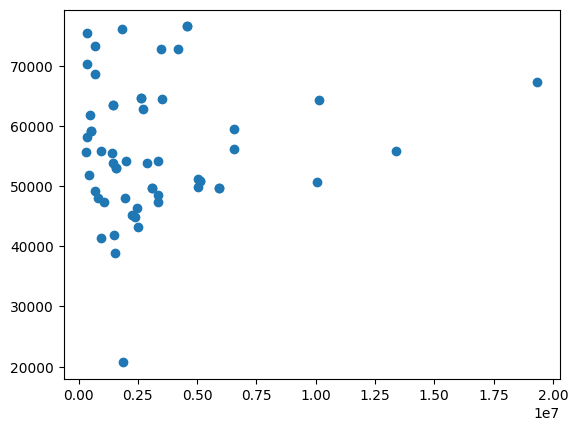

In [7]:
# теперь когда у нас есть все необходимые данные в правильном типе можно создавать график рассеяния
plt.scatter(us_census.women, us_census.Income)
plt.show()

In [8]:
# хотелось бы перепроверить свою работу. Вы знаете по опыту, что эти чудовищные файлы CSV, вероятно, содержат NaN значения! Распечатайте свой столбец с числом женщи в каждом штате, чтобы это проверить

print(us_census.women[us_census.women.isna()])

# заполните эти значения используя метод fillna(). Чтобы заполнить поспользуйтесь колонками TotalPop и men, где women это разница между значениями TotalPop - Men

us_census = us_census.fillna(value={'women': us_census.TotalPop - us_census.men})

0   NaN
1   NaN
5   NaN
Name: women, dtype: float64


In [9]:
# проверим наличие пропущенных данных снова
print(us_census.women[us_census.women.isna()])

Series([], Name: women, dtype: float64)


In [11]:
# мы забыли проверить данные на наличие дубликатов в данных
# используйте метод duplicated() чтобы проверить есть ли в DataFrame дублирующиеся строки
us_census.duplicated().value_counts()

False    60
Name: count, dtype: int64

In [12]:
# удалите дубликаты если они есть с помощью метода drop_duplicates()
us_census = us_census.drop_duplicates()

# проверьте снова есть ли дубликаты
us_census.duplicated().value_counts()

False    60
Name: count, dtype: int64

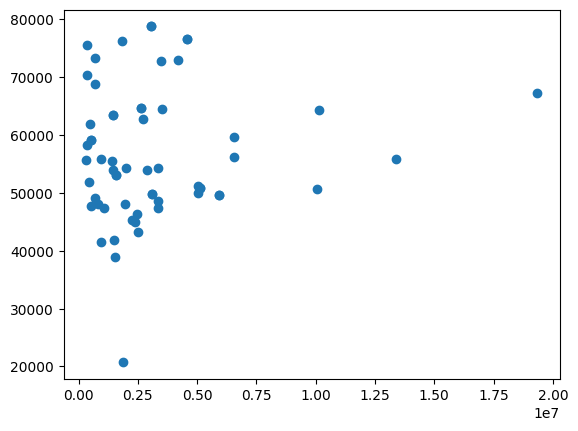

In [13]:
# снова постройте диаграмму рассеивания что нибудь изменилось? стало выглядеть лучше?
plt.scatter(us_census.women, us_census.Income)
plt.show()

## Гистограммы рас

Теперь ваш босс хочет, чтобы вы сделали кучу гистограмм из данных о рассах, которые у вас есть. Посмотрите на *`.columns`* снова, чтобы увидеть, какие категории расс есть.

In [14]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'women', 'men'],
      dtype='object')

Попробуйте построить гистограмму для каждого из них!

Вам придется преобразовать толбцы в числовой формат, и эти знаки процентов придется убрать.

Не забудьте заполнить *`NaN`* значения чем то, что имеет смысл! Вы вероятно удалили дубликаты строк, когда создавали свой последний график, но не помешает проверить их на наличие снова.

In [15]:
print(us_census.head())

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacific        Income  \
0  3.2474999999999983%  0.035833333333333335%  59125.270833   
1   1.249175824175822%  0.046978021978021964%  46296.807763   
2  1.019369

In [18]:
# соберем список наименований расс в отдельную переменную
race_list = ['Hispanic','White','Black','Native','Asian','Pacific']

# воспользовавшись циклов for пройдем по всем рассам в dataframe и перепишем их значения а также переведем в числовой тип
for race in race_list:
    us_census[race] = us_census[race].replace('[%$]','',regex=True)
    us_census[race] = pd.to_numeric(us_census[race])


print(us_census.head())
print(us_census.dtypes)

   Unnamed: 0           State  TotalPop   Hispanic      White      Black  \
0           0    Rhode Island   1053661  13.356667  74.325417   5.682917   
1           1  South Carolina   4777576   5.056685  62.888736  28.750916   
2           2    South Dakota    843190   3.239640  82.500901   1.423874   
3           3       Tennessee   6499615   4.720027  73.490088  18.283817   
4           4           Texas  26538614  38.046738  44.687909  11.650048   

     Native     Asian   Pacific        Income            GenderPop  \
0  0.346250  3.247500  0.035833  59125.270833      510388M_543273F   
1  0.292399  1.249176  0.046978  46296.807763    2322409M_2455167F   
2  9.417568  1.019369  0.041892  51805.405405      423477M_419713F   
3  0.226635  1.407283  0.043156  47328.083617    3167756M_3331859F   
4  0.261144  3.669696  0.068816  55874.522601  13171316M_13367298F   

        women       men  
0    543273.0    510388  
1   2455167.0   2322409  
2    419713.0    423477  
3   3331859.0   31

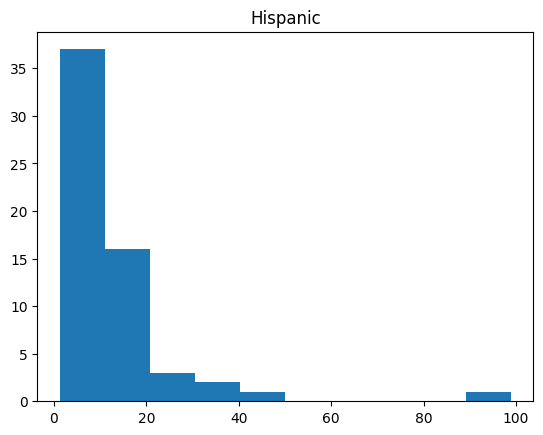

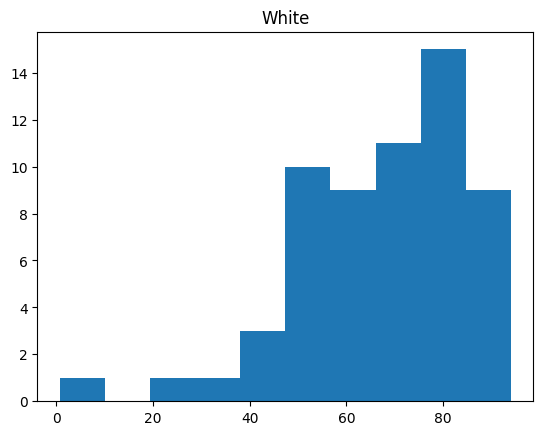

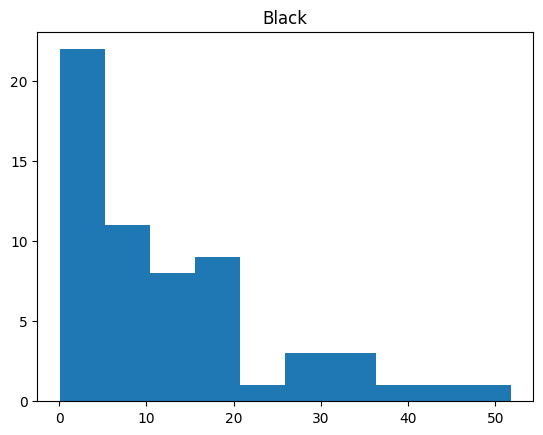

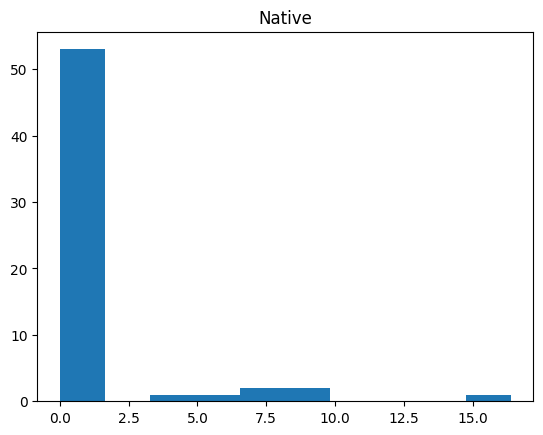

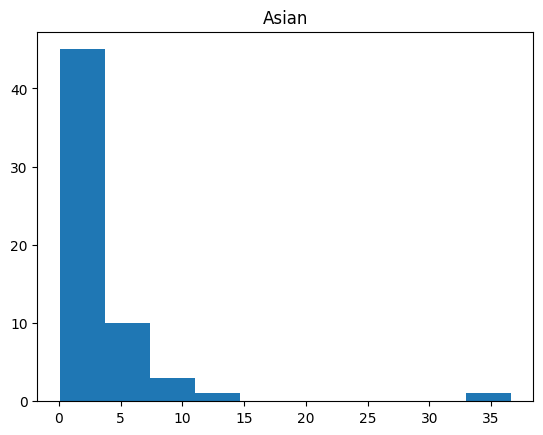

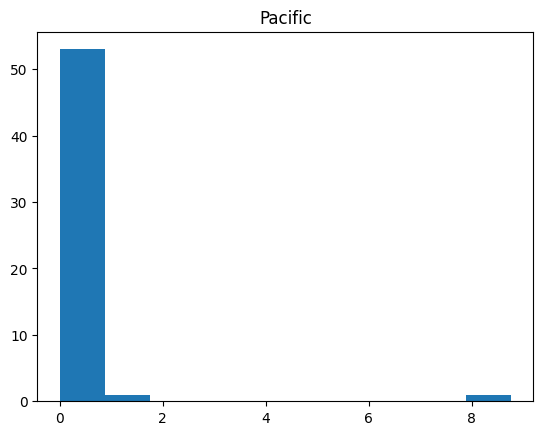

<Figure size 640x480 with 0 Axes>

In [20]:
# построим несколько гистограмм используя цикл for

for race in race_list:
    plt.hist(us_census[race])
    plt.title(race)
    plt.show()
    plt.clf()